In [30]:
import pandas as pd

In [31]:
## Data Ingestions step
df=pd.read_csv(r"data/gemstone.csv")
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
df.isnull().sum()

Carat(Weight of Daimond)    0
Cut(Quality)                0
Color                       0
Clarity                     0
Depth                       0
Table                       0
Price(in US dollars)        0
X(length)                   0
Y(width)                    0
Z(Depth)                    0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [34]:
df.duplicated().sum()

146

In [35]:
df=df.drop_duplicates()

In [36]:
df.duplicated().sum()

0

In [37]:
## Segregate Numerical and categorical columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print("Categorical columns",categorical_columns)

Numerical columns: Index(['Carat(Weight of Daimond)', 'Depth', 'Table', 'Price(in US dollars)',
       'X(length)', 'Y(width)', 'Z(Depth)'],
      dtype='object')
Categorical columns Index(['Cut(Quality)', 'Color', 'Clarity'], dtype='object')


In [38]:
df[categorical_columns].describe()

,Cut(Quality),Color,Clarity
count,53794,53794,53794
unique,5,7,8
top,Ideal,G,SI1
freq,21488,11262,13032


In [39]:
df['Cut(Quality)'].value_counts()

Cut(Quality)
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

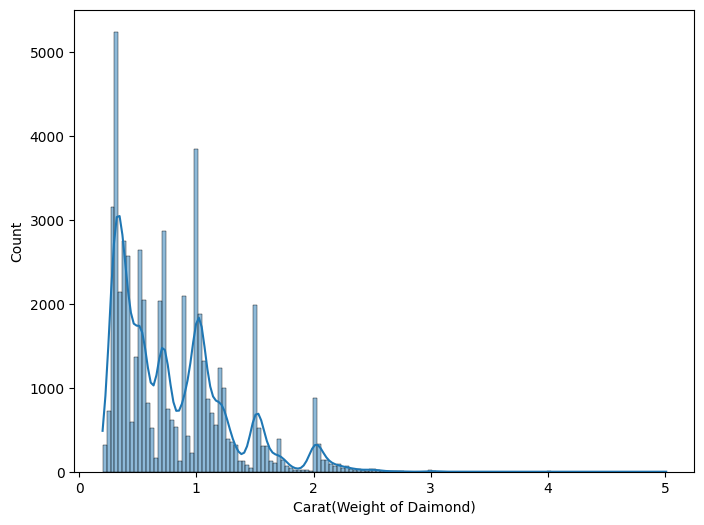

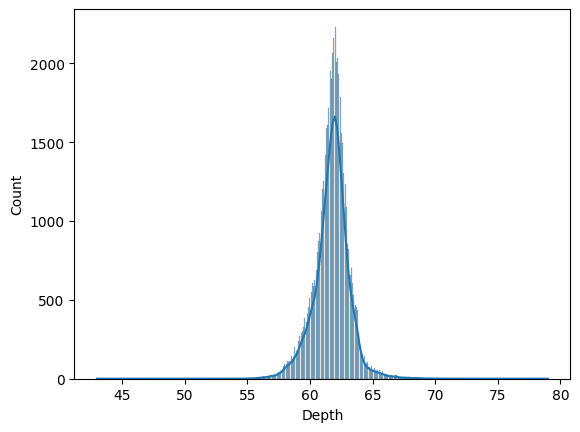

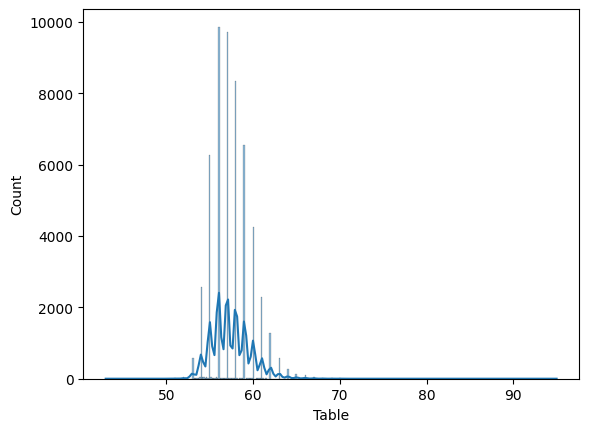

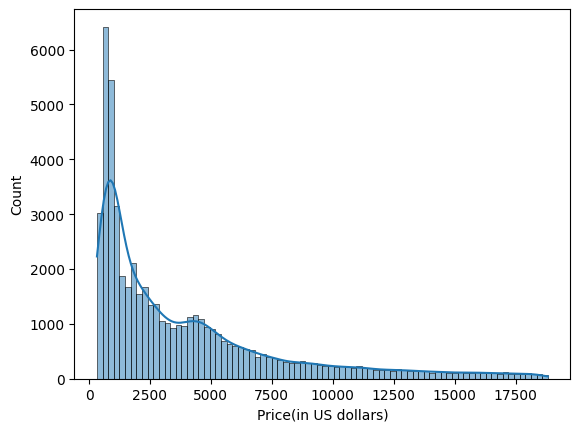

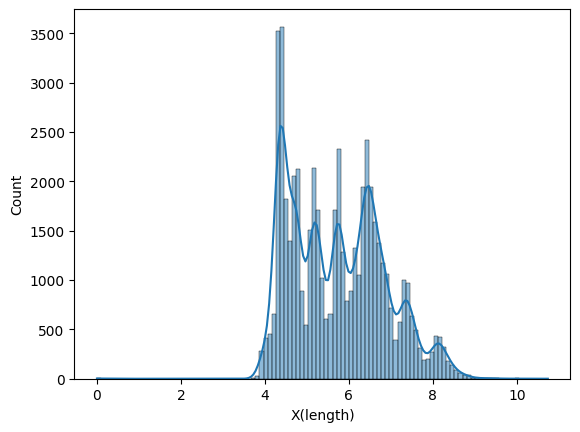

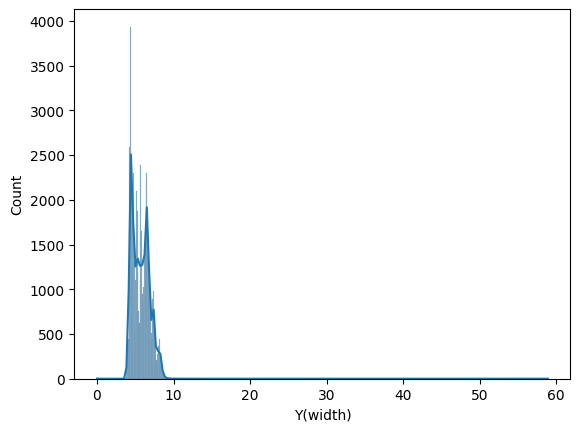

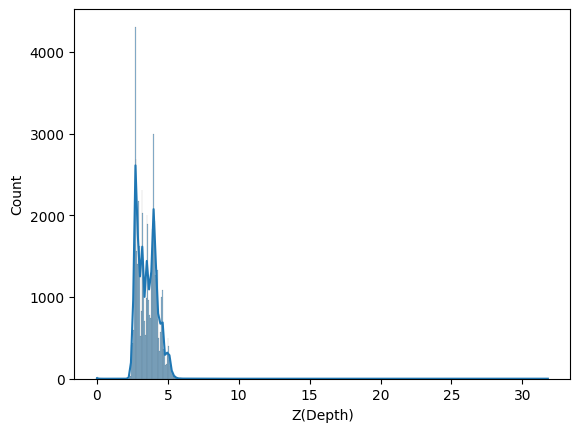

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()
    

<Axes: >

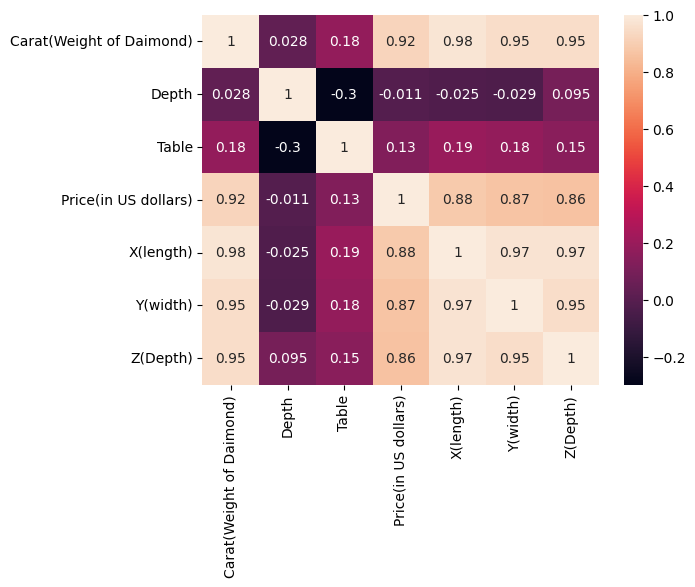

In [41]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [42]:
df['Cut(Quality)'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [43]:
cut_map={'Ideal':1,'Premiunm':2,'Good':3,'Very Good':4,'Fair':5}

In [44]:
df['Clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [45]:
clarity_map={'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8}

In [46]:
df['Color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [47]:
color_map={'E':1, 'I':2, 'J':3, 'H':4, 'F':5, 'G':6, 'D':7}

In [48]:
df['Cut(Quality)']=df['Cut(Quality)'].map(cut_map)
df['Clarity']=df['Clarity'].map(clarity_map)
df['Color']=df['Color'].map(color_map)


In [49]:
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,1.0,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,NaN,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3.0,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,NaN,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3.0,3,1,63.3,58.0,335,4.34,4.35,2.75


In [50]:
## Independent and dependent feature 
X=df.drop(labels=['Price(in US dollars)'],axis=1)
Y=df[['Price(in US dollars)']]

In [51]:
X

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,X(length),Y(width),Z(Depth)
0,0.23,1.0,1,1,61.5,55.0,3.95,3.98,2.43
1,0.21,NaN,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,3.0,1,3,56.9,65.0,4.05,4.07,2.31
3,0.29,NaN,2,4,62.4,58.0,4.20,4.23,2.63
4,0.31,3.0,3,1,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,1.0,7,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,3.0,7,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4.0,7,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,NaN,4,1,61.0,58.0,6.15,6.12,3.74


In [52]:
Y


,Price(in US dollars)
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [53]:
## Define which columns should be ordinal-encoded and which should be scaled
categorical_cols=X.select_dtypes(include='object').columns
numerical_cols=X.select_dtypes(exclude='object').columns

In [58]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair','Good','Very Good','Premium','Ideal']
color_categories=['D','E','F','G','H','I','J']
clarity_categories=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [59]:
from sklearn.impute import SimpleImputer ## Handling Missing Values
from sklearn.preprocessing import StandardScaler #Handling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder #Ordinal Encoding

## Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [61]:
## Numerical Pipeline 
num_pipeline=Pipeline(
    steps=[
        ('Imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

# Categorical Pipeline
cat_pipeline = Pipeline(
    steps=[
        ('Imputer',SimpleImputer(strategy='most_frequent')),
        ('OrdinalEncoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
        ('scaler',StandardScaler())

    ]

)
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
])

In [63]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)


In [64]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [65]:
X_train.head()

,num_pipeline__Carat(Weight of Daimond),num_pipeline__Cut(Quality),num_pipeline__Color,num_pipeline__Clarity,num_pipeline__Depth,num_pipeline__Table,num_pipeline__X(length),num_pipeline__Y(width),num_pipeline__Z(Depth)
0,-1.051584,-0.705346,-1.549776,-0.713652,-0.033284,0.243924,-1.284193,-1.278314,-1.277823
1,0.429992,1.464750,-1.549776,0.425643,1.435995,0.691446,0.465214,0.525171,0.681416
2,0.916795,-0.705346,0.402218,0.995291,0.036682,-0.651121,1.036449,0.989434,1.012758
3,-1.030418,1.464750,-1.549776,-0.713652,0.876270,-0.203599,-1.284193,-1.260458,-1.191386
4,0.218338,1.464750,-1.061778,-0.713652,1.016201,-0.651121,0.375959,0.346608,0.494136


In [66]:
## Model Training 
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [67]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [68]:
regression.coef_

array([[ 4972.75300921,  -100.46593643,   173.26601123,   443.90227779,
         -247.40838749,  -150.4032686 , -1656.36974077,   307.52854672,
          203.99484495]])

In [69]:
import numpy as np 
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [71]:
## Train multiple models
## Model Evaluation
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    ## Make Prediction
    y_pred=model.predict(X_test)
    mae,rmse,r2_square=evaluate_model(y_test,y_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance ')
    print("RMSE",rmse)
    print("MAE",mae)
    print("R2_Square",r2_square*100)
    r2_list.append(r2_square)

    print("="*35)
    print('\n')


LinearRegression
Model Training Performance 
RMSE 1440.5620449086125
MAE 854.6895746632455
R2_Square 86.9490608466697


Lasso
Model Training Performance 
RMSE 1436.4776338437098
MAE 854.7034472122426
R2_Square 87.0229623246948


Ridge
Model Training Performance 
RMSE 1440.4139732324606
MAE 854.8001506398995
R2_Square 86.95174365387757


ElasticNet
Model Training Performance 
RMSE 1738.4767904886967
MAE 1123.9457938104886
R2_Square 80.99291036436576


